In [ ]:
!pip install kneed

In [197]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc

from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as shc
#training

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from kneed import KneeLocator





%matplotlib inline

# Drawing Functions

In [132]:
##my functions
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
from scipy.spatial.distance import cdist

def draw_elbows(d1,rang):
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, rang)
    print("Kmeans")
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k,random_state=0).fit(d1)
        kmeanModel.fit(d1)
        distortions.append(sum(np.min(cdist(d1, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / d1.shape[0])
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(d1, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / d1.shape[0]
        mapping2[k] = kmeanModel.inertia_
  
        unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

        #sillouhette score
        score=-1
        if k>1:
            pred=kmeanModel.fit_predict(d1)
            score=silhouette_score(d1,pred)


        xx= np.vstack((unique, ( (counts/d1.shape[0])*100) )).T
        print(f" data clustered using k={k} :\n{xx} percentage")
        print(" ")
     
        print(f"silhouette score : {score}")
        print(" ")
        print("--------------------------------------------------------")

        

    plt.plot(K, distortions, '*-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion for Kmeans')
    plt.grid(True)
    plt.show()


In [133]:
def draw_dendogram(d1,methods=["ward","average","single","complete"]):
    for method in methods:

        #try 30,50
        plt.figure(figsize=(30,30))
        plt.title(f"Counters Dendograms ({method}-euclidean)",fontweight='bold',fontsize=14.0)
        dend = shc.dendrogram(shc.linkage(y=d1 , method=method,metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                              #and method with linkage criteria

        c_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage=method)
        clusters=c_model.fit_predict(d1)
        score=silhouette_score(d1,c_model.labels_,metric='euclidean')


        plt.xlabel(f"score for 2 clusters:{score}",fontweight='bold',fontsize=14.0)
        


In [134]:
#plotting score with k
def draw_elbow_agg(d):
    
    methods=["ward","average","single","complete"]
    for method in methods:
        scores=[]
        for c in range(2,11):
            c_model=AgglomerativeClustering(n_clusters=c,affinity='euclidean',linkage=method)
            clusters=c_model.fit_predict(d)
            score=silhouette_score(d,c_model.labels_,metric='euclidean')
            scores.append(score)
            
#             unique, counts = np.unique(c_model.labels_, return_counts=True)

#             xx= dict(zip(unique, counts))
#             print(f" data clustered using k={c} : {xx}")
#             print("--------------------------------------------------------")
        
        plt.plot(list(range(2,11)),scores,"-*",label=method)
        plt.xlabel("no. of clusters")
        plt.ylabel("sillhouette score")
        plt.title(f"hierarical clustering")
    plt.grid(True)
    plt.legend()
    plt.show()

In [135]:
def print_k_agg(d):
    
    methods=["ward","average","single","complete"]
    for method in methods:
        print("***********************************************************")
        print(f"for {method} :")
        scores=[]
        for c in range(2,11):
            c_model=AgglomerativeClustering(n_clusters=c,affinity='euclidean',linkage=method)
            clusters=c_model.fit_predict(d)
            score=silhouette_score(d,c_model.labels_,metric='euclidean')
            scores.append(score)
            
            unique, counts = np.unique(c_model.labels_, return_counts=True)

            xx= np.vstack((unique, ( (counts/d.shape[0])*100) )).T
            print(f" data clustered using k={c} :\n{xx} percentage")
            print(f"sillhouette score : {score}")
            print("--------------------------------------------------------")
        
        top=max(scores)
        print("--------------------")
        print(f"best score for {method}: {top}")
        
        

In [136]:
#plotting score with k
def draw_elbow_gmm(d):
    scores=[]
    for c in range(2,11):
        gmm=GaussianMixture(n_components=c).fit(d)
        labels=gmm.predict(d)
        score=silhouette_score(d,labels,metric="euclidean")
        scores.append(score) #to draw the plot
        
        unique, counts = np.unique(labels, return_counts=True)
        xx= np.vstack((unique, ( (counts/d.shape[0])*100) )).T
        print(f" data clustered using k={c} :\n{xx} percentage")
        print(f"sillhouette score : {score}")
        print("--------------------------------------------------------")

    plt.plot(list(range(2,11)),scores,"-*",label="GMM")
    plt.xlabel("no. of clusters")
    plt.ylabel("sillhouette score")
    plt.title(f"GMM")
    plt.grid(True)
    plt.legend()
    plt.show()

In [137]:
def draw_dbscan(d):
##https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62

        nearest_neighbors = NearestNeighbors(n_neighbors=11)
        neighbors = nearest_neighbors.fit(d)
        distances, indices = neighbors.kneighbors(d)
        distances = np.sort(distances[:,10], axis=0)
        
        
        i = np.arange(len(distances))
        knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        fig = plt.figure(figsize=(15, 5))
        knee.plot_knee()
        plt.xlabel("Points")
        plt.ylabel("Distance")

        
        plt.grid(True)
        plt.show()
        
        print(f"Elbow Distance : {distances[knee.knee]}")

In [192]:
def print_k_dbscan(d1,eps):
    for i in range(5,100,10):
        db=DBSCAN(eps=eps,min_samples=i)
        db.fit_predict(d1)
       
        score=silhouette_score(d1,db.labels_,metric="euclidean")
        
        unique, counts = np.unique(db.labels_, return_counts=True)
        xx= np.vstack((unique, ( (counts/d1.shape[0])*100) )).T
        print(f"Sillouette score {score}")
        print(f" data clustered using min_neighbors={i} :\n{xx} percentage\n -------------------------------- \n")

In [139]:
def print_pca(draft):
    scores=[]
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    k=2
 
    
    for i in range(2,18):
        pca=PCA(n_components=i)
        dd=pca.fit_transform(draft)
        dd=pd.DataFrame(dd)


    


        #train the model
        kmeanModel=KMeans(n_clusters=2,random_state=0).fit(dd)
        clusters=kmeanModel.fit(dd)
        
        
        score=silhouette_score(dd,kmeanModel.labels_,metric='euclidean')
        scores.append(score)
        print(f"for PCA components : {i}\nsillouette score = {score}")
        print("-----------------------------------------------")
        distortions.append(sum(np.min(cdist(dd, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / dd.shape[0])
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(dd, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / dd.shape[0]
        mapping2[k] = kmeanModel.inertia_
  
        unique, counts = np.unique(kmeanModel.labels_, return_counts=True)

        #sillouhette score
        score=-1
        if k>1:
            pred=kmeanModel.fit_predict(dd)
            score=silhouette_score(dd,pred)


        xx= np.vstack((unique, ( (counts/dd.shape[0])*100) )).T
        print(f" data clustered using {2} clusters :\n{xx} percentage")
        print(" ")
    
        print("********************************************************")

        


    top=max(scores)
    print("--------------------")
    print(f"best score : {top}")
    print(f"for PCA : {scores.index(top)+2}")
        

In [168]:
def agg_pca(draft):
    methods=["ward","average","single","complete"]
    for method in methods:
        scores=[]
        for i in range(2,18):
            pca=PCA(n_components=i,random_state=0)
            dd=pca.fit_transform(draft)
            dd=pd.DataFrame(dd)




            #train the model
            c_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage=method)
            clusters=c_model.fit_predict(dd)
            score=silhouette_score(dd,c_model.labels_,metric='euclidean')
            scores.append(score)
            print(f"using k = 2 for PCA components : {i}\n sillouette score = {score}")


            unique, counts = np.unique(c_model.labels_, return_counts=True)

            xx= np.vstack((unique, ( (counts/dd.shape[0])*100) )).T
            print(f" data clustered using {2} clusters :\n{xx} percentage")
            print(" ")

            print("********************************************************")


    
        top=max(scores)
        print("--------------------")
        print(f"best score for {method} : {top}")
        print(f"for PCA : {scores.index(top)+2}")
        print("--------------------")



In [190]:
# def dbscan_pca(draft,eps,i):
#     for p in range(2,18):
#         pca=PCA(n_components=p)
#         dd=pca.fit_transform(draft)
#         dd=pd.DataFrame(dd)
        
      
#         db=DBSCAN(eps=eps,min_samples=i)
#         db.fit_predict(dd)
        
#         print(db.labels_)
#         score=0
#         if len(db.labels_>1):
#             score=silhouette_score(dd,db.labels_,metric="euclidean")
        
        
#         unique, counts = np.unique(db.labels_, return_counts=True)
#         xx= np.vstack((unique, ( (counts/dd.shape[0])*100) )).T
    
#         print(f"data clustered using min_neighbors={i}  :\n{xx} percentage\n -------------------------------- \n")
#         print("------------------------------")
#         print(f"PCA components : {i}\nsillouette score = {score}")
#         print("********************************")

    

In [214]:
def draw_gmm_pca(data,c):
    scores=[]
    for i in range(2,18):
        pca=PCA(n_components=i)
        dd=pca.fit_transform(data)
        dd=pd.DataFrame(dd)
        gmm=GaussianMixture(n_components=c).fit(dd)
        labels=gmm.predict(dd)
        score=silhouette_score(dd,labels,metric="euclidean")
        scores.append(score) #to draw the plot
        
        unique, counts = np.unique(labels, return_counts=True)
        xx= np.vstack((unique, ( (counts/dd.shape[0])*100) )).T
        print(f" for PCA component : {i} ")
        print(f" data clustered using k={c} :\n{xx} percentage")
        print(f"sillhouette score : {score}")
        print("--------------------------------------------------------")
    
    plt.plot(list(range(2,18)),scores,"-*",label="GMM")
    plt.xlabel("no. of components")
    plt.ylabel("sillhouette score")
    plt.title(f"GMM")
    plt.grid(True)
    plt.legend()
    plt.show()
        

## Read Data

In [143]:
df=pd.read_csv("CC GENERAL.csv")

# Data Investigation

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [145]:
df.isna().sum()
#fillna with Knn imputer

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [146]:
df.duplicated().sum()

0

In [147]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [148]:
IDs=df["CUST_ID"]

In [149]:
df=df.drop("CUST_ID",axis=1)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [151]:
print(f"Skewness:\n{ df.skew(axis = 0, skipna = True)}")

Skewness:
BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64


In [152]:
print(f"Kurtosis:\n{df.kurt()}")

Kurtosis:
BALANCE                               7.674751
BALANCE_FREQUENCY                     3.092370
PURCHASES                           111.388771
ONEOFF_PURCHASES                    164.187572
INSTALLMENTS_PURCHASES               96.575178
CASH_ADVANCE                         52.899434
PURCHASES_FREQUENCY                  -1.638631
ONEOFF_PURCHASES_FREQUENCY            1.161846
PURCHASES_INSTALLMENTS_FREQUENCY     -1.398632
CASH_ADVANCE_FREQUENCY                3.334734
CASH_ADVANCE_TRX                     61.646862
PURCHASES_TRX                        34.793100
CREDIT_LIMIT                          2.836656
PAYMENTS                             54.770736
MINIMUM_PAYMENTS                    283.989986
PRC_FULL_PAYMENT                      2.432395
TENURE                                7.694823
dtype: float64


In [153]:
df.columns.tolist()

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

# Data Visualization

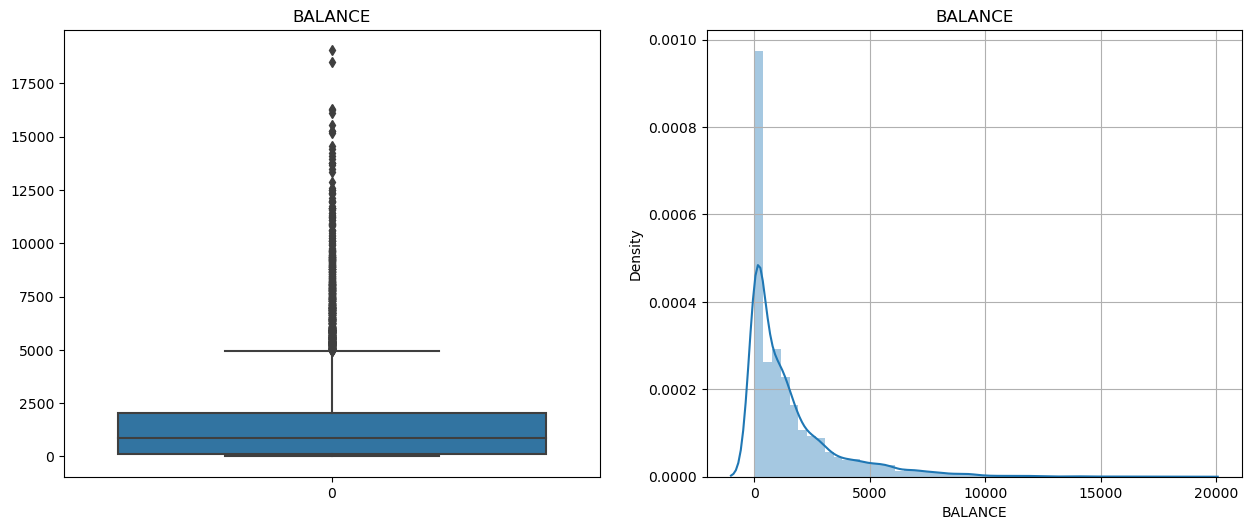

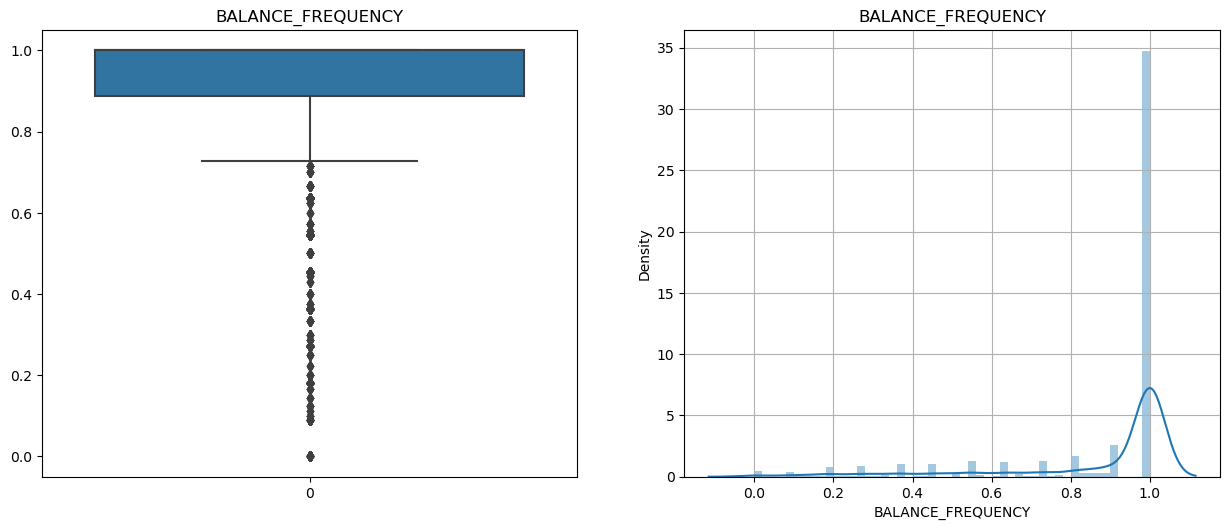

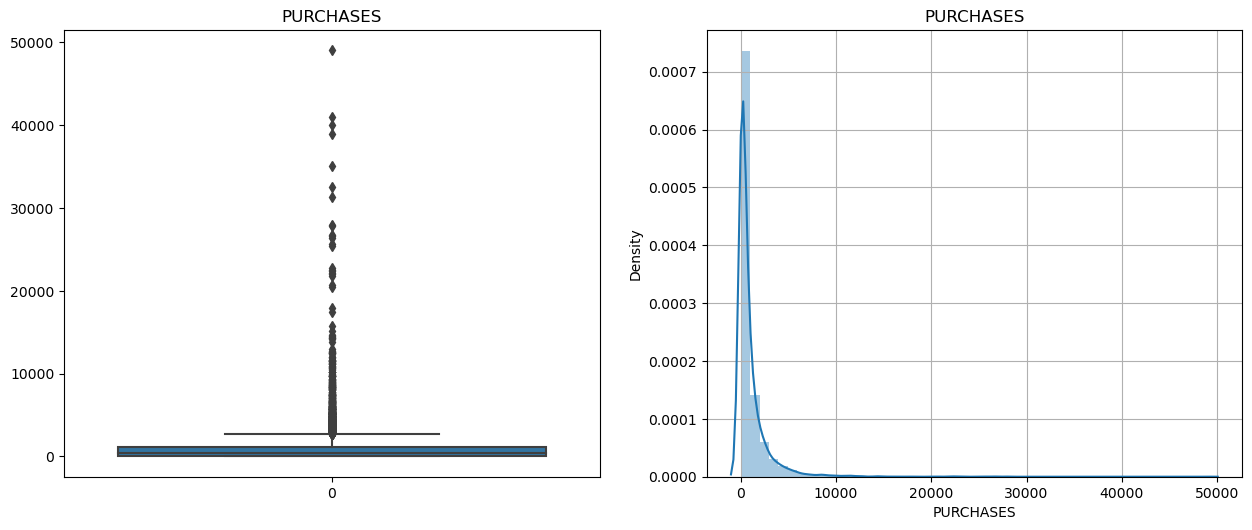

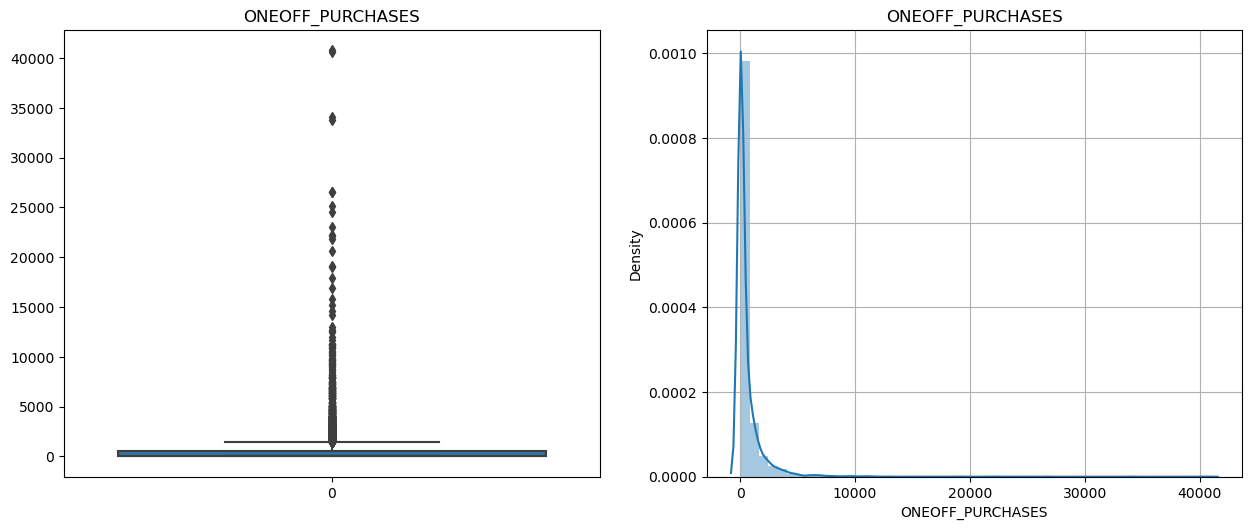

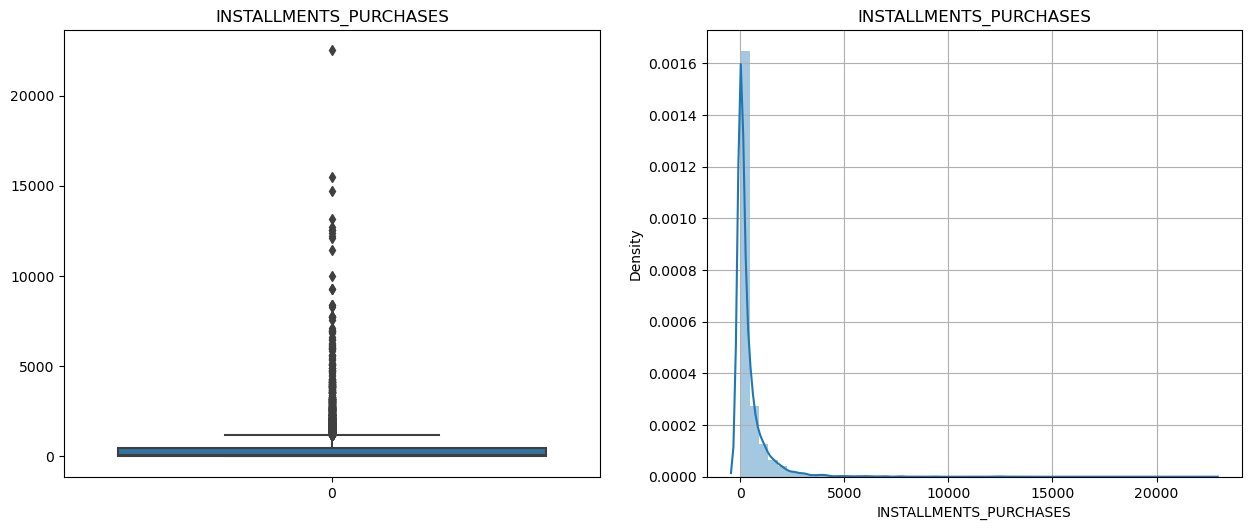

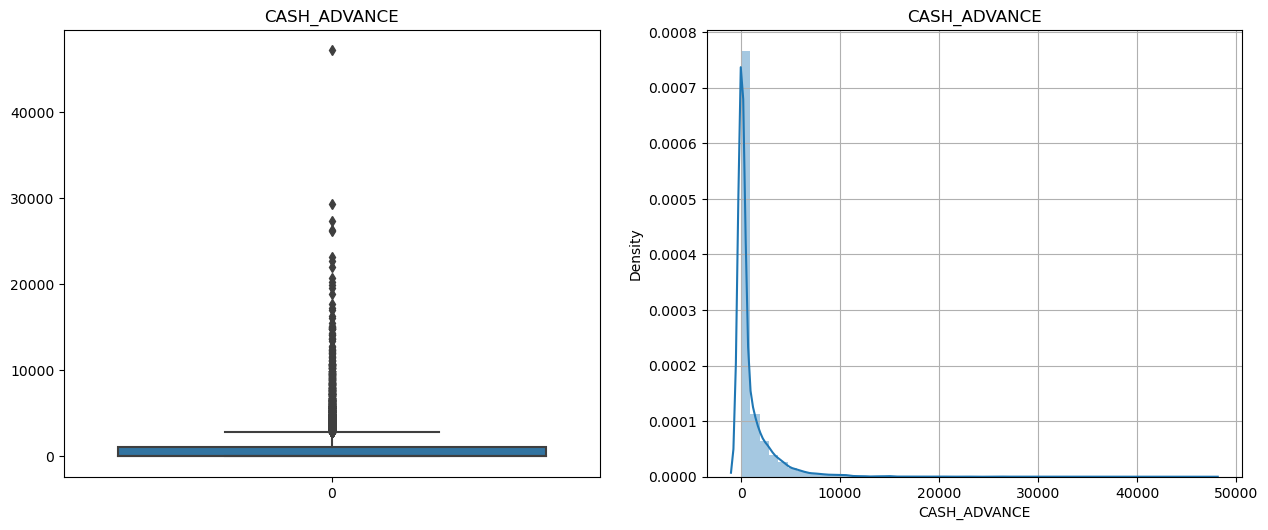

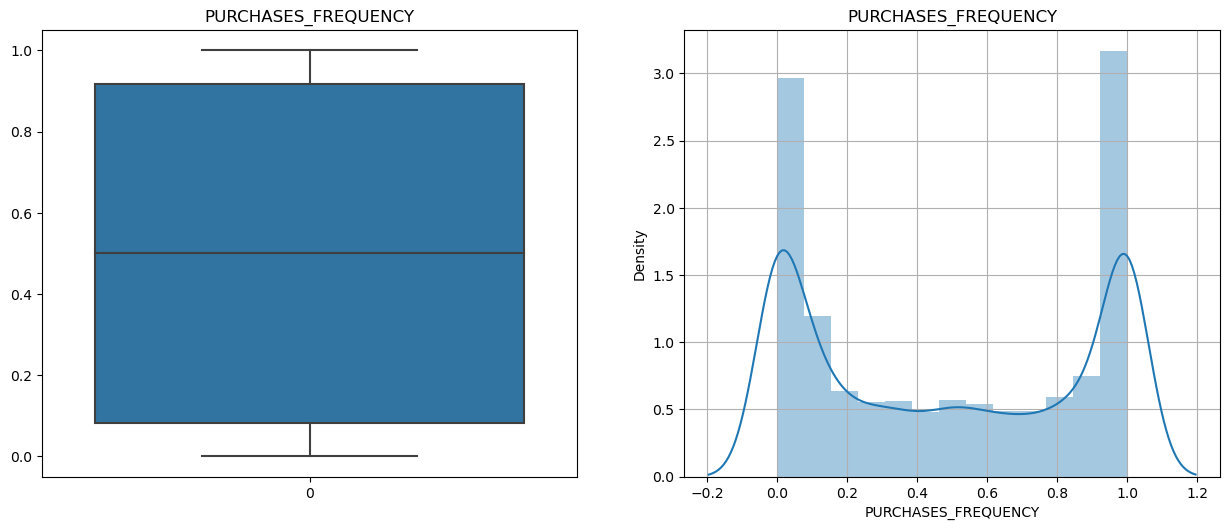

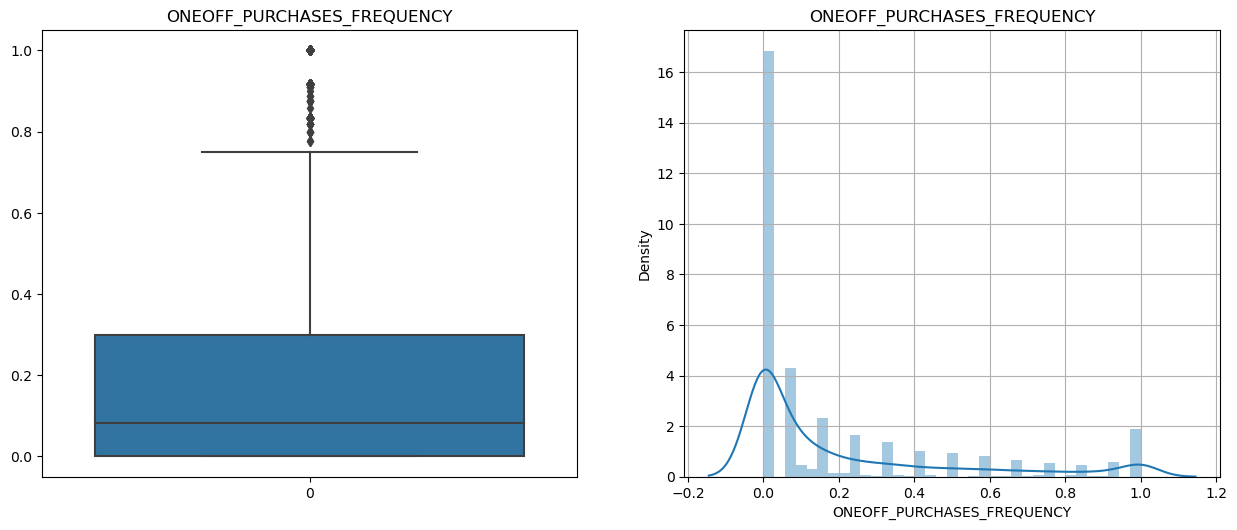

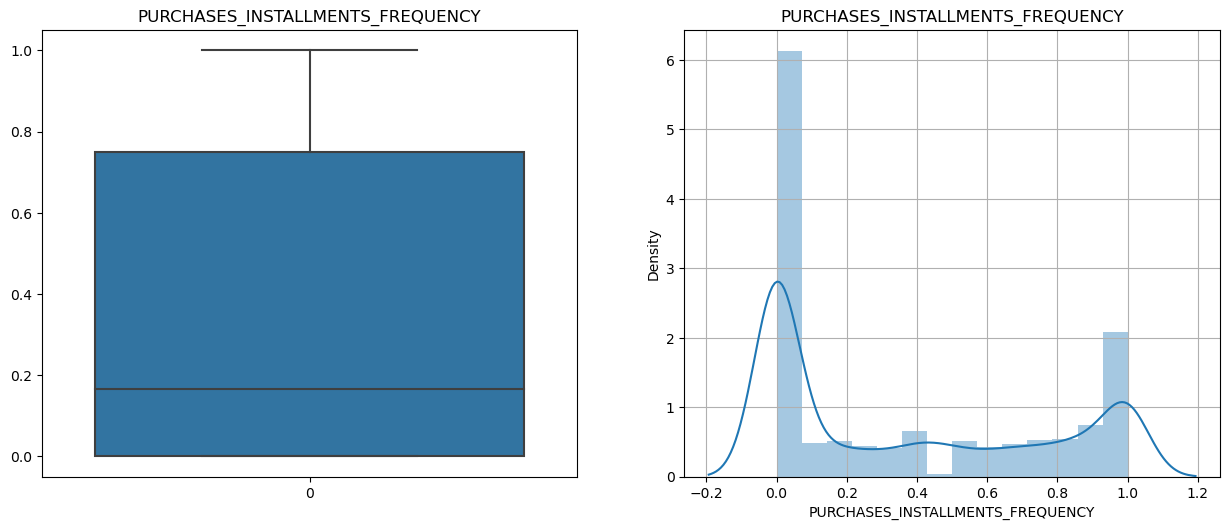

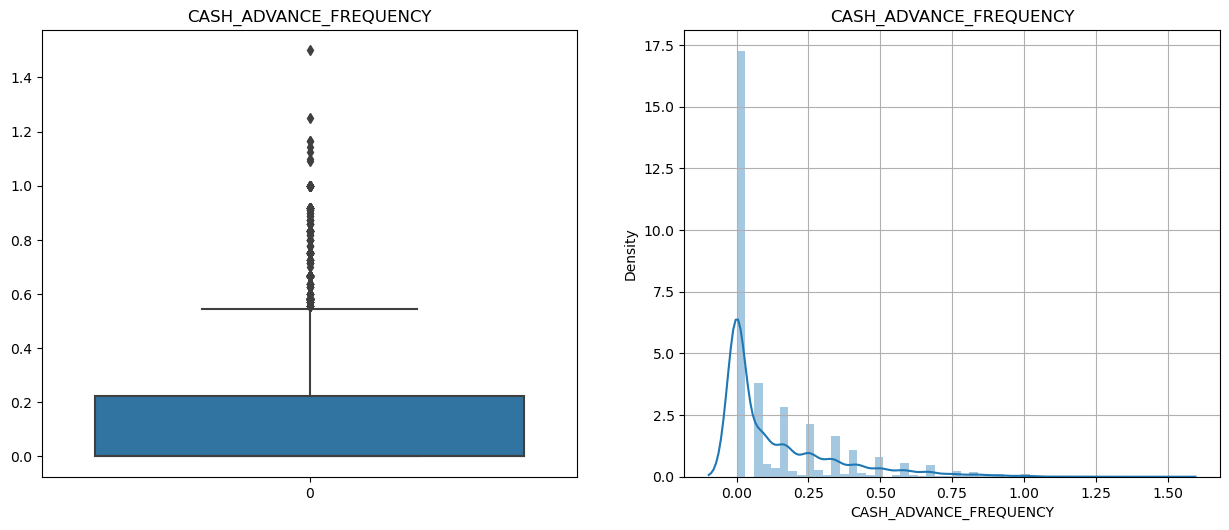

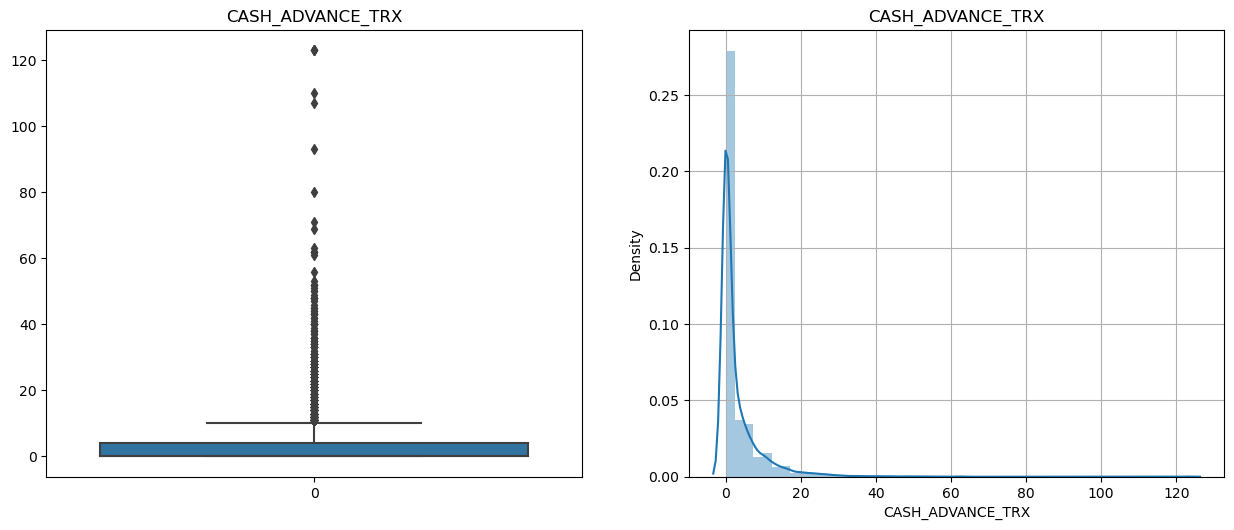

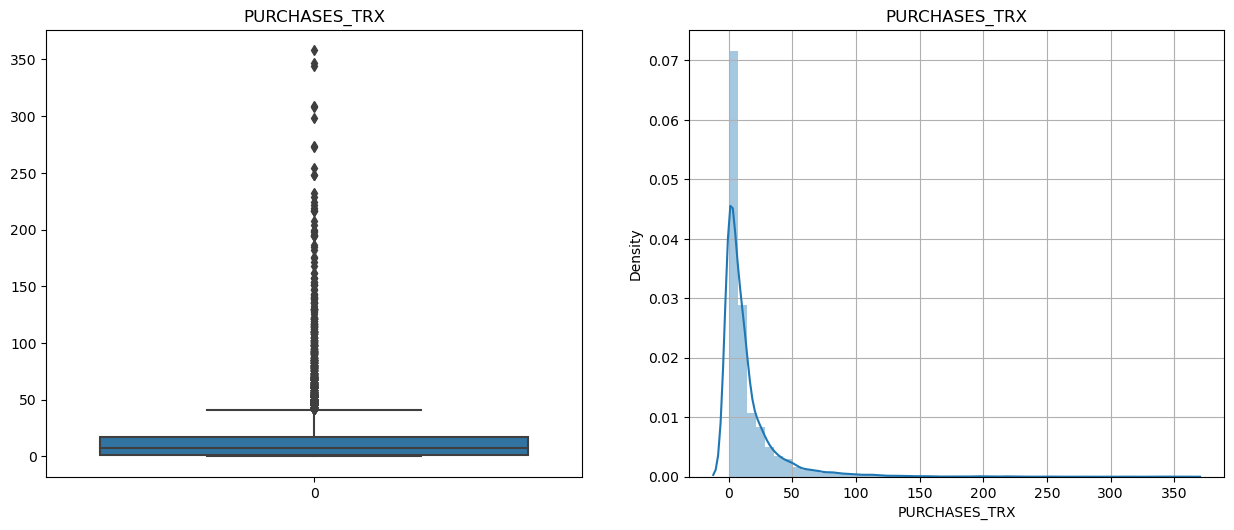

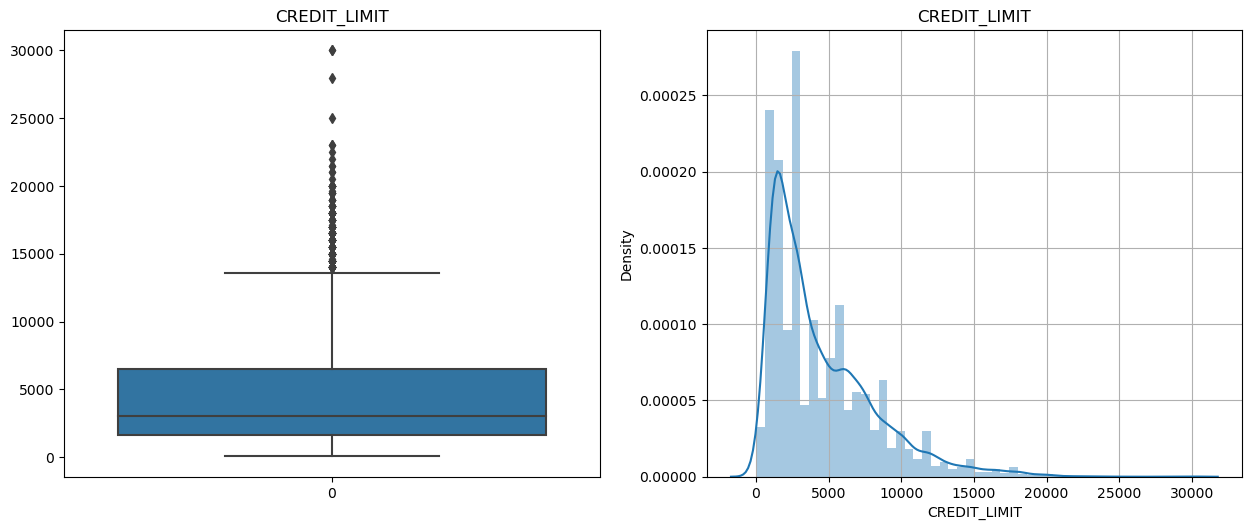

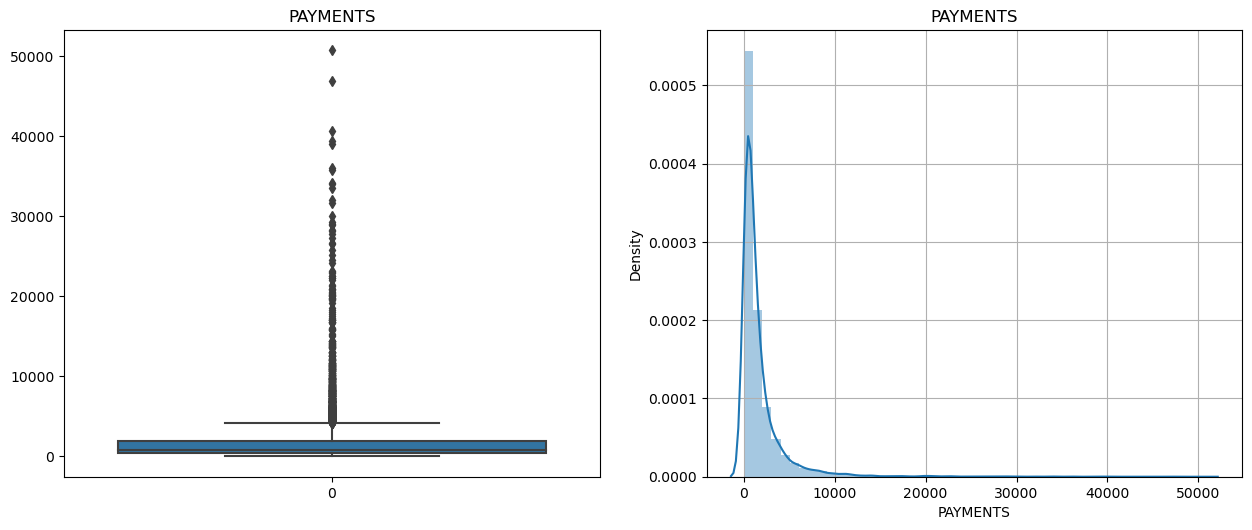

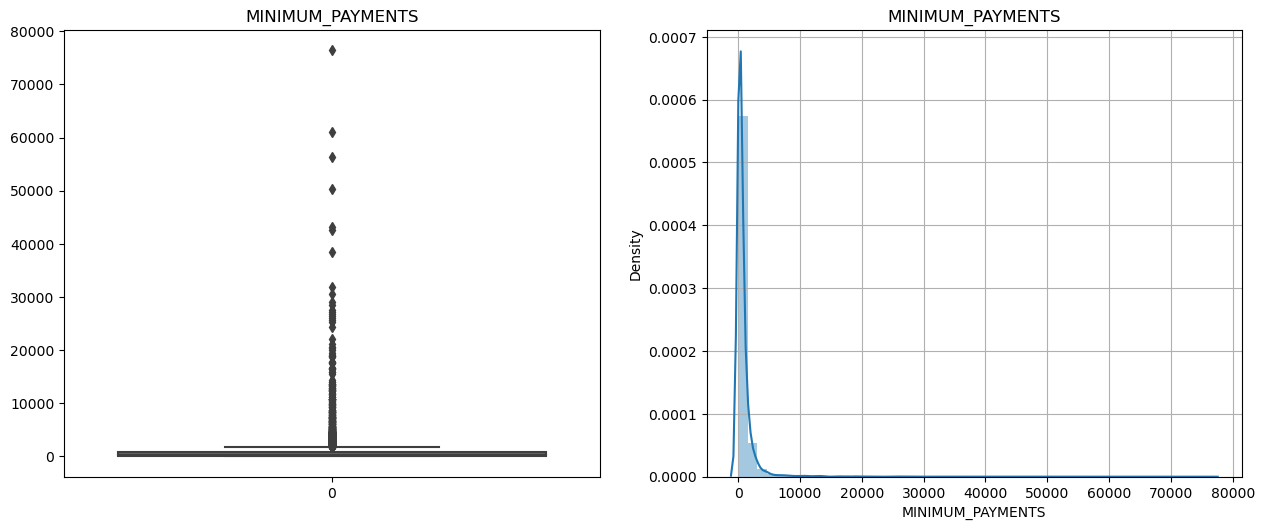

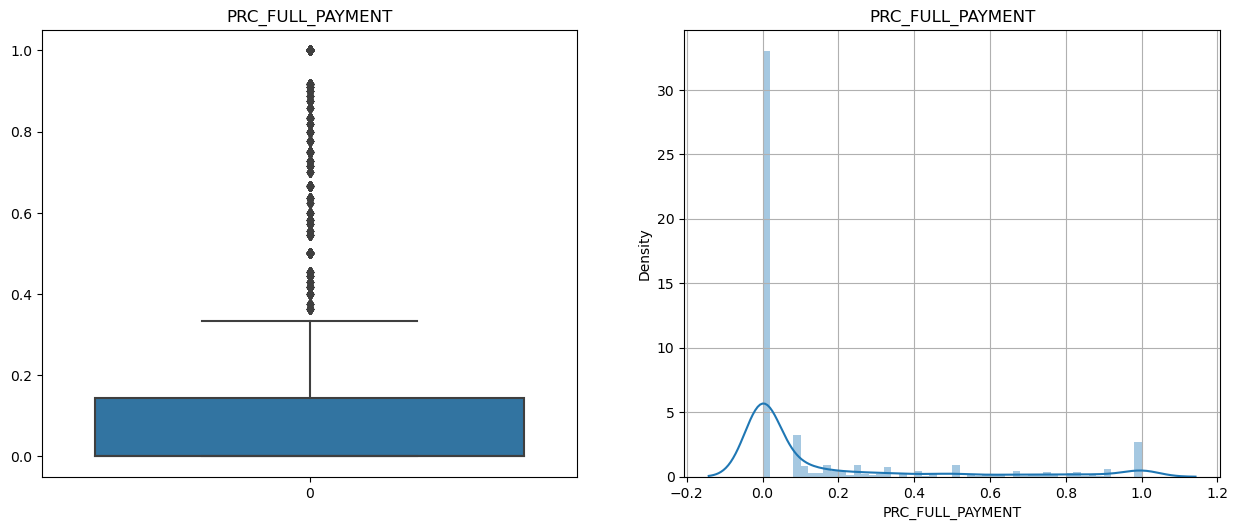

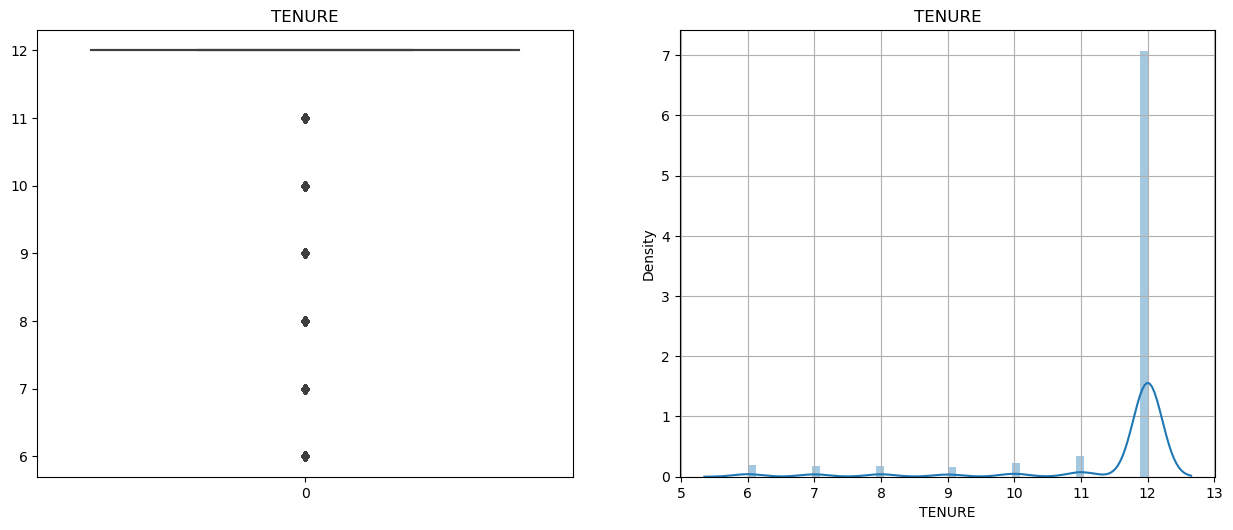

In [103]:
##distribution plot
##box plot for outlier
##both of them in the same row
##correlation heatmap
rows=['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

for col in rows:
    fig = plt.figure(figsize=(15.2, 5.8))
    i=1
    ax1=fig.add_subplot(1,2,i)
    sns.boxplot(df[col],ax=ax1)
    plt.title(col) 
    
    i=2
    ax1=fig.add_subplot(1,2,i)
    sns.distplot(df[col],ax=ax1)
    plt.title(col)
    plt.grid(True)
    plt.show()
           
#     plt.show()


# Data Preprocessing

In [104]:
#data types are correct
#we dropped the identifer
#the null data will be filled by median

In [154]:
#the zero meaning there is no minimum payment so in actaulity we have 210 null in payments
df['PAYMENTS'][df['PAYMENTS'] == 0].count()


240

In [155]:
df['MINIMUM_PAYMENTS'][(df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna())] = 0

In [156]:
df.isna().sum()


BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         1
PAYMENTS                             0
MINIMUM_PAYMENTS                    73
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

## imputation

#### impute with median

In [108]:
# df=df.fillna(df.median())

#### impute with Knn imputer 

In [157]:
imputer = KNNImputer(n_neighbors=5)
df=imputer.fit_transform(df)
df=pd.DataFrame(data=df,columns=rows)

In [158]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [159]:
##get two Data frame one for pca and one for withour pca

In [160]:
#wihout pca
data_1=df.copy()

In [161]:
data_2=df.copy()

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

## scaling

In [162]:
#using powertransformer
scaler=PowerTransformer()
data_1=scaler.fit_transform(data_1)
data_1=pd.DataFrame(data=data_1,columns=rows)


data_2=scaler.fit_transform(data_2)
data_2=pd.DataFrame(data=data_2,columns=rows)

In [80]:
#using robust
# scaler=RobustScaler()
# datap=scaler.fit_transform(df)
# datap=pd.DataFrame(data=data,columns=rows)

In [164]:
data_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.238103,-1.079348,-0.368050,-1.000488,0.383704,-0.944538,-0.766859,-0.903315,-0.606642,-0.883204,-0.905801,-0.573664,-1.425309,-0.983876,-0.633040,-0.677889,0.422252
1,1.051961,-0.424939,-1.505149,-1.000488,-1.085422,1.399909,-1.278866,-0.903315,-1.004445,1.124423,1.044342,-1.387624,0.924254,1.285321,0.826998,1.235021,0.422252
2,0.860616,0.628612,0.521657,1.065381,-1.085422,-0.944538,1.218860,1.732554,-1.004445,-0.883204,-0.905801,0.494757,1.012224,-0.291722,0.404769,-0.677889,0.422252
3,0.570542,-1.710851,0.875823,1.229556,-1.085422,0.680451,-1.015926,-0.092230,-1.004445,0.136071,0.194580,-0.872718,1.012224,-2.782085,-2.934229,-0.677889,0.422252
4,0.111925,0.628612,-0.904786,-0.019902,-1.085422,-0.944538,-1.015926,-0.092230,-1.004445,-0.883204,-0.905801,-0.872718,-1.215648,-0.231669,-0.268677,-0.677889,0.422252


In [82]:
data_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,1.332826e-16,-9.939858e-15,1.147598e-15,-1.971880e-15,-2.526595e-16,-2.124334e-15,4.835735e-16,-4.987196e-16,1.707883e-15,-6.795309e-17,-8.050171e-16,1.304754e-15,1.068518e-15,6.785385e-17,-2.209034e-16,-2.782430e-15,1.697870e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-2.120305e+00,-1.997716e+00,-1.505149e+00,-1.000488e+00,-1.085422e+00,-9.445384e-01,-1.278866e+00,-9.033151e-01,-1.004445e+00,-8.832040e-01,-9.058009e-01,-1.387624e+00,-4.573636e+00,-2.782085e+00,-2.934229e+00,-6.778889e-01,-2.526612e+00
25%,-8.168070e-01,-5.989922e-01,-6.547989e-01,-1.000488e+00,-1.085422e+00,-9.445384e-01,-1.015926e+00,-9.033151e-01,-1.004445e+00,-8.832040e-01,-9.058009e-01,-8.727179e-01,-8.805181e-01,-6.089046e-01,-5.337739e-01,-6.778889e-01,4.222524e-01
50%,1.516813e-01,6.286119e-01,1.607696e-01,2.375163e-01,3.611963e-01,-9.445384e-01,1.196567e-01,-9.222973e-02,-2.738452e-01,-8.832040e-01,-9.058009e-01,1.432569e-01,-1.295795e-01,-6.428417e-02,-1.522133e-01,-6.778889e-01,4.222524e-01
75%,7.179130e-01,6.286119e-01,7.102506e-01,9.909450e-01,9.060999e-01,1.059052e+00,1.050283e+00,9.780771e-01,1.069884e+00,1.016910e+00,1.044342e+00,7.291175e-01,8.301281e-01,5.694526e-01,5.823603e-01,8.541173e-01,4.222524e-01
max,2.731227e+00,6.286119e-01,3.559070e+00,1.959134e+00,2.212015e+00,1.729923e+00,1.218860e+00,1.732554e+00,1.377136e+00,1.902718e+00,1.921254e+00,2.838620e+00,2.851604e+00,4.568553e+00,5.459271e+00,1.873638e+00,4.222524e-01


## Kmeans

Kmeans
 data clustered using k=1 :
[[  0. 100.]] percentage
 
silhouette score : -1
 
--------------------------------------------------------
 data clustered using k=2 :
[[ 0. 64.]
 [ 1. 36.]] percentage
 
silhouette score : 0.2620566949710681
 
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         34.9273743 ]
 [ 1.         32.22346369]
 [ 2.         32.84916201]] percentage
 
silhouette score : 0.23619531137130664
 
--------------------------------------------------------
 data clustered using k=4 :
[[ 0.         30.61452514]
 [ 1.         18.11173184]
 [ 2.         22.53631285]
 [ 3.         28.73743017]] percentage
 
silhouette score : 0.22980599903839125
 
--------------------------------------------------------
 data clustered using k=5 :
[[ 0.         15.4301676 ]
 [ 1.         22.08938547]
 [ 2.         17.26256983]
 [ 3.         27.83240223]
 [ 4.         17.38547486]] percentage
 
silhouette score : 0.24276766744891634
 
---------

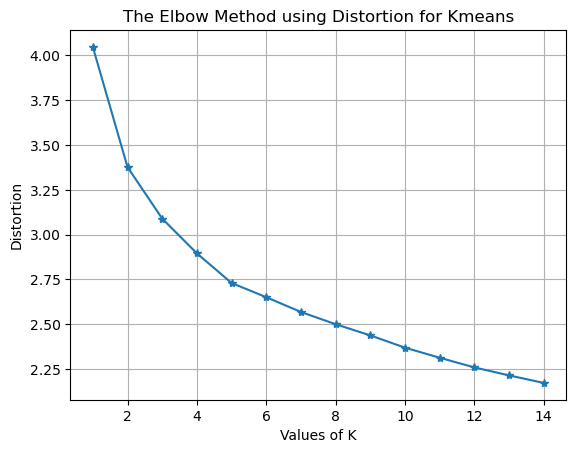

In [85]:
# draw elbows
draw_elbows(data_1,15)
#k=3 is the most reasonable with power transformer
#k=7 is the most reasonable with robust transformer


## Kmeans PCA

In [217]:
#check different values for PCA with initial 2 clusters to get the best score components
print_pca(data_2)

for PCA components : 2
sillouette score = 0.4421658296747377
-----------------------------------------------
 data clustered using 2 clusters :
[[ 0.         63.87709497]
 [ 1.         36.12290503]] percentage
 
********************************************************
for PCA components : 3
sillouette score = 0.3779278651875355
-----------------------------------------------
 data clustered using 2 clusters :
[[ 0.         36.18994413]
 [ 1.         63.81005587]] percentage
 
********************************************************
for PCA components : 4
sillouette score = 0.34183501781768355
-----------------------------------------------
 data clustered using 2 clusters :
[[ 0.         36.07821229]
 [ 1.         63.92178771]] percentage
 
********************************************************
for PCA components : 5
sillouette score = 0.31528617495170363
-----------------------------------------------
 data clustered using 2 clusters :
[[ 0.         64.01117318]
 [ 1.         35.988

In [ ]:
##results with pca and robustscaler with component - 2 and k -3 are reasonable

Kmeans
 data clustered using k=1 :
[[  0. 100.]] percentage
 
silhouette score : -1
 
--------------------------------------------------------
 data clustered using k=2 :
[[ 0.         63.87709497]
 [ 1.         36.12290503]] percentage
 
silhouette score : 0.4421658298546762
 
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         32.82681564]
 [ 1.         32.58100559]
 [ 2.         34.59217877]] percentage
 
silhouette score : 0.4343075324899832
 
--------------------------------------------------------
 data clustered using k=4 :
[[ 0.         22.7150838 ]
 [ 1.         27.87709497]
 [ 2.         30.7150838 ]
 [ 3.         18.69273743]] percentage
 
silhouette score : 0.43154807879857987
 
--------------------------------------------------------
 data clustered using k=5 :
[[ 0.         15.15083799]
 [ 1.         26.7150838 ]
 [ 2.         24.99441341]
 [ 3.         17.46368715]
 [ 4.         15.67597765]] percentage
 
silhouette score : 

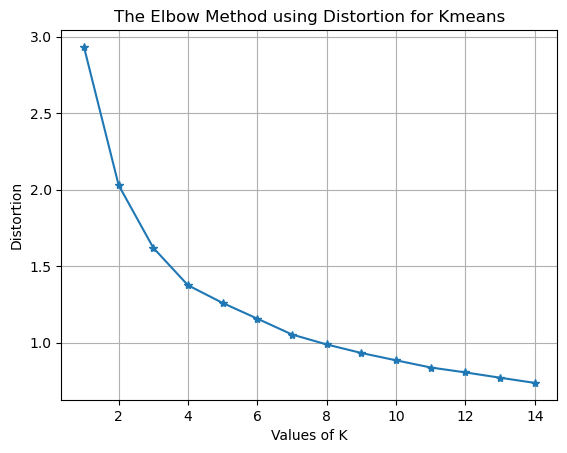

In [218]:
#plot the kmeans with n=2 
pca=PCA(n_components=2,random_state=0)
kk=pca.fit_transform(data_2)
kk=pd.DataFrame(kk)

draw_elbows(kk,15)

#### kmeans at k=3 : 0.23619531137130664
#### kmeans + PCA  ( 2 components ) at  k = 3 : 0.4343075324899832   + lower distortion
#### both of them [3 → 5] has good clustering ratio

In [39]:
#kmeans(data,3) 
#we cannot visualize the data here beacuse it's mulidimensional

## Hierarical clustering

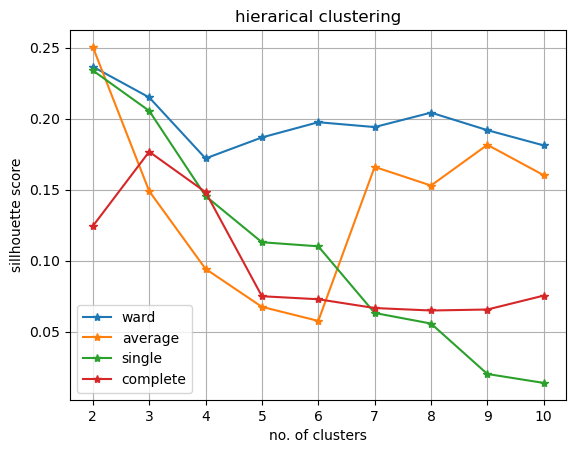

In [165]:
draw_elbow_agg(data_1)

In [166]:
print_k_agg(data_1)
#k=2→4 has the best clustering  with ward

***********************************************************
for ward :
 data clustered using k=2 :
[[ 0.         46.90502793]
 [ 1.         53.09497207]] percentage
sillhouette score : 0.23656902835318425
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         53.09497207]
 [ 1.         24.12290503]
 [ 2.         22.78212291]] percentage
sillhouette score : 0.21493547053340045
--------------------------------------------------------
 data clustered using k=4 :
[[ 0.         38.07821229]
 [ 1.         24.12290503]
 [ 2.         22.78212291]
 [ 3.         15.01675978]] percentage
sillhouette score : 0.17197036608326113
--------------------------------------------------------
 data clustered using k=5 :
[[ 0.         21.11731844]
 [ 1.         24.12290503]
 [ 2.         22.78212291]
 [ 3.         15.01675978]
 [ 4.         16.96089385]] percentage
sillhouette score : 0.18673606586942196
--------------------------------------------------------
 da

 data clustered using k=10 :
[[0.00000000e+00 9.98659218e+01]
 [1.00000000e+00 4.46927374e-02]
 [2.00000000e+00 1.11731844e-02]
 [3.00000000e+00 1.11731844e-02]
 [4.00000000e+00 1.11731844e-02]
 [5.00000000e+00 1.11731844e-02]
 [6.00000000e+00 1.11731844e-02]
 [7.00000000e+00 1.11731844e-02]
 [8.00000000e+00 1.11731844e-02]
 [9.00000000e+00 1.11731844e-02]] percentage
sillhouette score : 0.013901634007292222
--------------------------------------------------------
--------------------
best score for single: 0.233895535917275
***********************************************************
for complete :
 data clustered using k=2 :
[[ 0.        72.5027933]
 [ 1.        27.4972067]] percentage
sillhouette score : 0.12431177954474751
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         27.4972067 ]
 [ 1.         36.06703911]
 [ 2.         36.43575419]] percentage
sillhouette score : 0.17669134383587506
----------------------------------------------

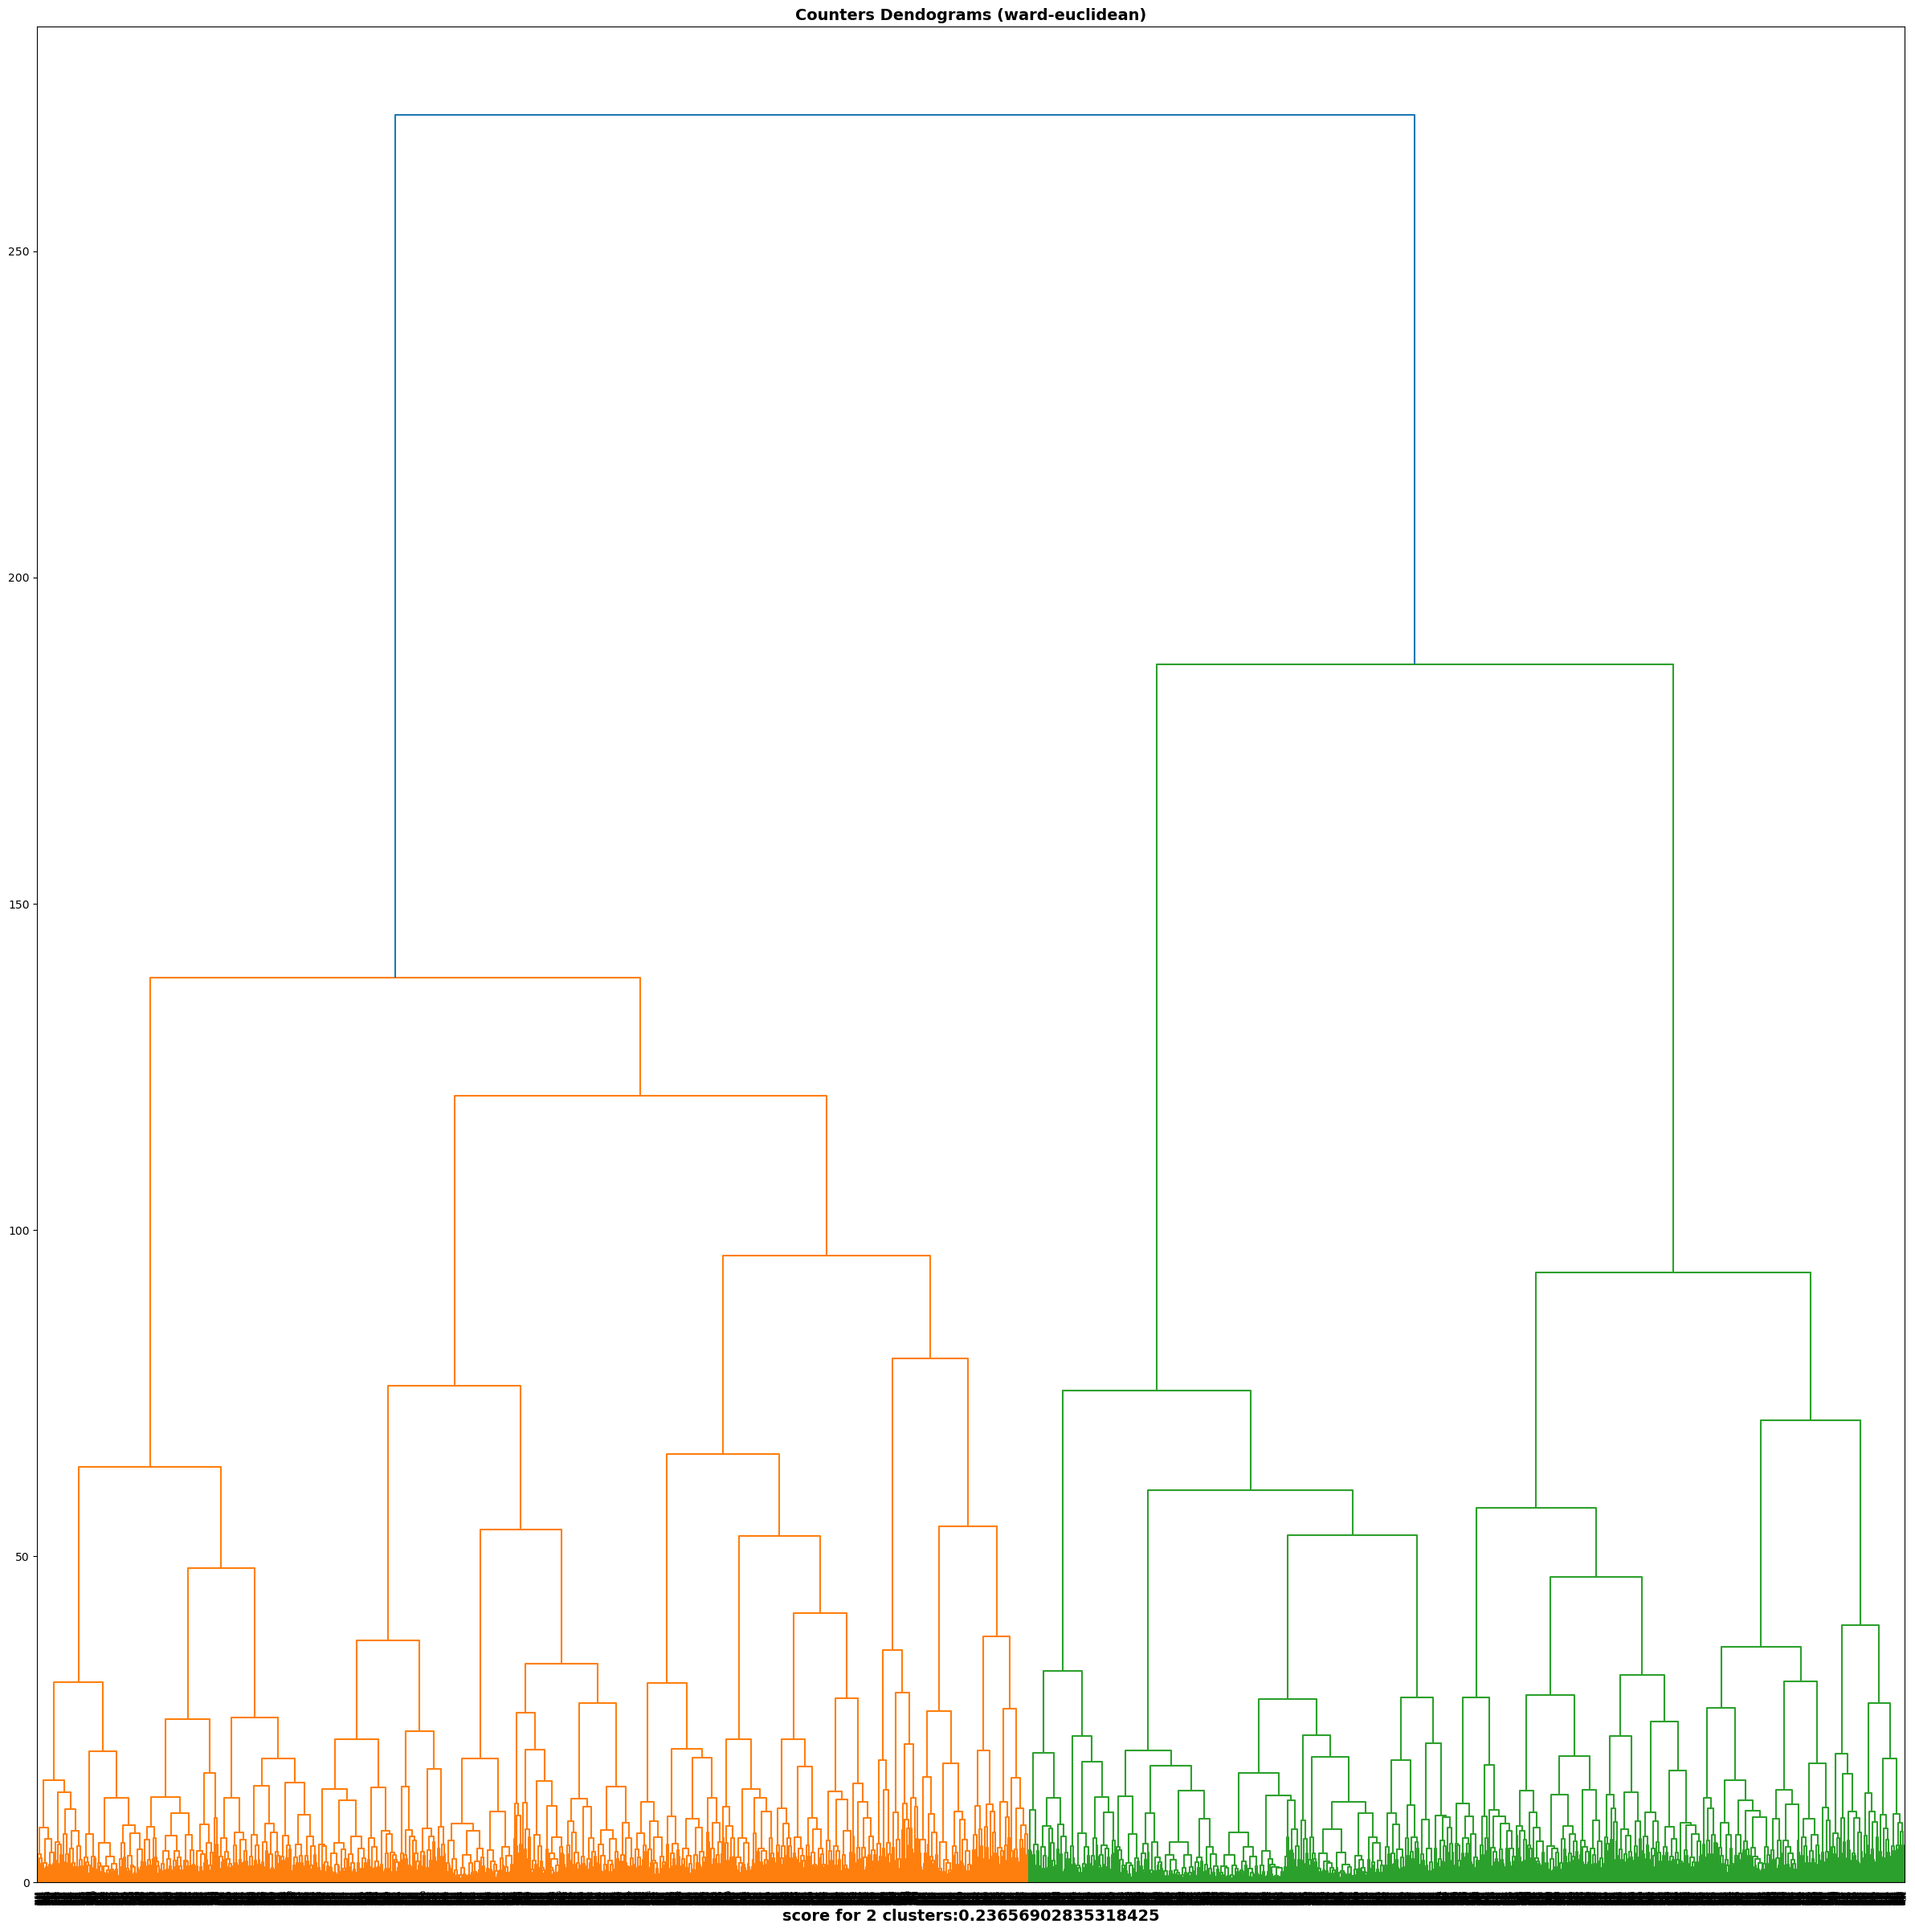

In [167]:
draw_dendogram(data_1,["ward"])

# Hierarical + PCA

In [43]:
#investigate differenct components
agg_pca(data_2)
# either choose the highest score component then suitable k 
# or choose component with the best clustering 
# component =2 is better than component =4 beacuse of the high sillouette score


using k = 2 for PCA components : 2
sillouette score = 0.4392739021714831
 data clustered using 2 clusters :
[[ 0.         68.69273743]
 [ 1.         31.30726257]] percentage
 
********************************************************
using k = 2 for PCA components : 3
sillouette score = 0.3385183395246057
 data clustered using 2 clusters :
[[ 0.         42.94972067]
 [ 1.         57.05027933]] percentage
 
********************************************************
using k = 2 for PCA components : 4
sillouette score = 0.31089143489137255
 data clustered using 2 clusters :
[[ 0.         48.52513966]
 [ 1.         51.47486034]] percentage
 
********************************************************
using k = 2 for PCA components : 5
sillouette score = 0.2857908504964159
 data clustered using 2 clusters :
[[ 0.         48.31284916]
 [ 1.         51.68715084]] percentage
 
********************************************************
using k = 2 for PCA components : 6
sillouette score = 0.27635204433

using k = 2 for PCA components : 4
sillouette score = 0.22351570445919908
 data clustered using 2 clusters :
[[0.00000000e+00 9.99888268e+01]
 [1.00000000e+00 1.11731844e-02]] percentage
 
********************************************************
using k = 2 for PCA components : 5
sillouette score = 0.15168006471972467
 data clustered using 2 clusters :
[[0.00000000e+00 9.99776536e+01]
 [1.00000000e+00 2.23463687e-02]] percentage
 
********************************************************
using k = 2 for PCA components : 6
sillouette score = 0.3282601158461507
 data clustered using 2 clusters :
[[0.00000000e+00 9.99888268e+01]
 [1.00000000e+00 1.11731844e-02]] percentage
 
********************************************************
using k = 2 for PCA components : 7
sillouette score = 0.3194376178107563
 data clustered using 2 clusters :
[[0.00000000e+00 9.99888268e+01]
 [1.00000000e+00 1.11731844e-02]] percentage
 
********************************************************
using k = 2 for PC

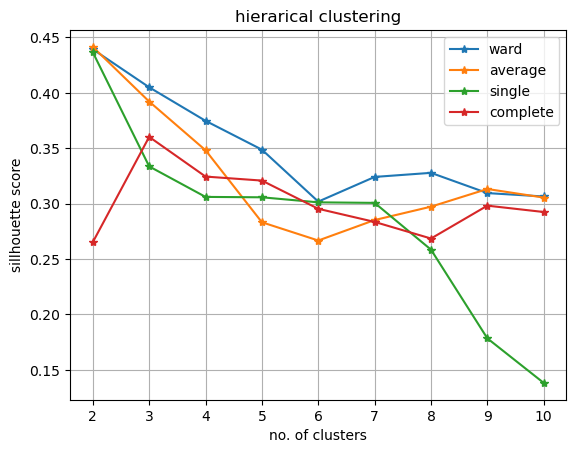

In [170]:
pca=PCA(n_components=2)
dd=pca.fit_transform(data_2)
dd=pd.DataFrame(dd)

draw_elbow_agg(dd)

In [171]:
print_k_agg(dd)

***********************************************************
for ward :
 data clustered using k=2 :
[[ 0.         68.69273743]
 [ 1.         31.30726257]] percentage
sillhouette score : 0.4392739013717943
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         24.05586592]
 [ 1.         31.30726257]
 [ 2.         44.63687151]] percentage
sillhouette score : 0.40496912059537904
--------------------------------------------------------
 data clustered using k=4 :
[[ 0.         44.63687151]
 [ 1.         31.30726257]
 [ 2.         10.98324022]
 [ 3.         13.0726257 ]] percentage
sillhouette score : 0.37471814551237487
--------------------------------------------------------
 data clustered using k=5 :
[[ 0.         31.30726257]
 [ 1.         33.69832402]
 [ 2.         10.98324022]
 [ 3.         13.0726257 ]
 [ 4.         10.93854749]] percentage
sillhouette score : 0.34871525284202926
--------------------------------------------------------
 dat

 data clustered using k=10 :
[[0.00000000e+00 4.46927374e-02]
 [1.00000000e+00 9.98324022e+01]
 [2.00000000e+00 3.35195531e-02]
 [3.00000000e+00 1.11731844e-02]
 [4.00000000e+00 1.11731844e-02]
 [5.00000000e+00 2.23463687e-02]
 [6.00000000e+00 1.11731844e-02]
 [7.00000000e+00 1.11731844e-02]
 [8.00000000e+00 1.11731844e-02]
 [9.00000000e+00 1.11731844e-02]] percentage
sillhouette score : 0.13827213999405222
--------------------------------------------------------
--------------------
best score for single: 0.43654289161843735
***********************************************************
for complete :
 data clustered using k=2 :
[[ 0.         80.23463687]
 [ 1.         19.76536313]] percentage
sillhouette score : 0.2652731626275472
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         55.58659218]
 [ 1.         19.76536313]
 [ 2.         24.64804469]] percentage
sillhouette score : 0.36023849453419515
------------------------------------------

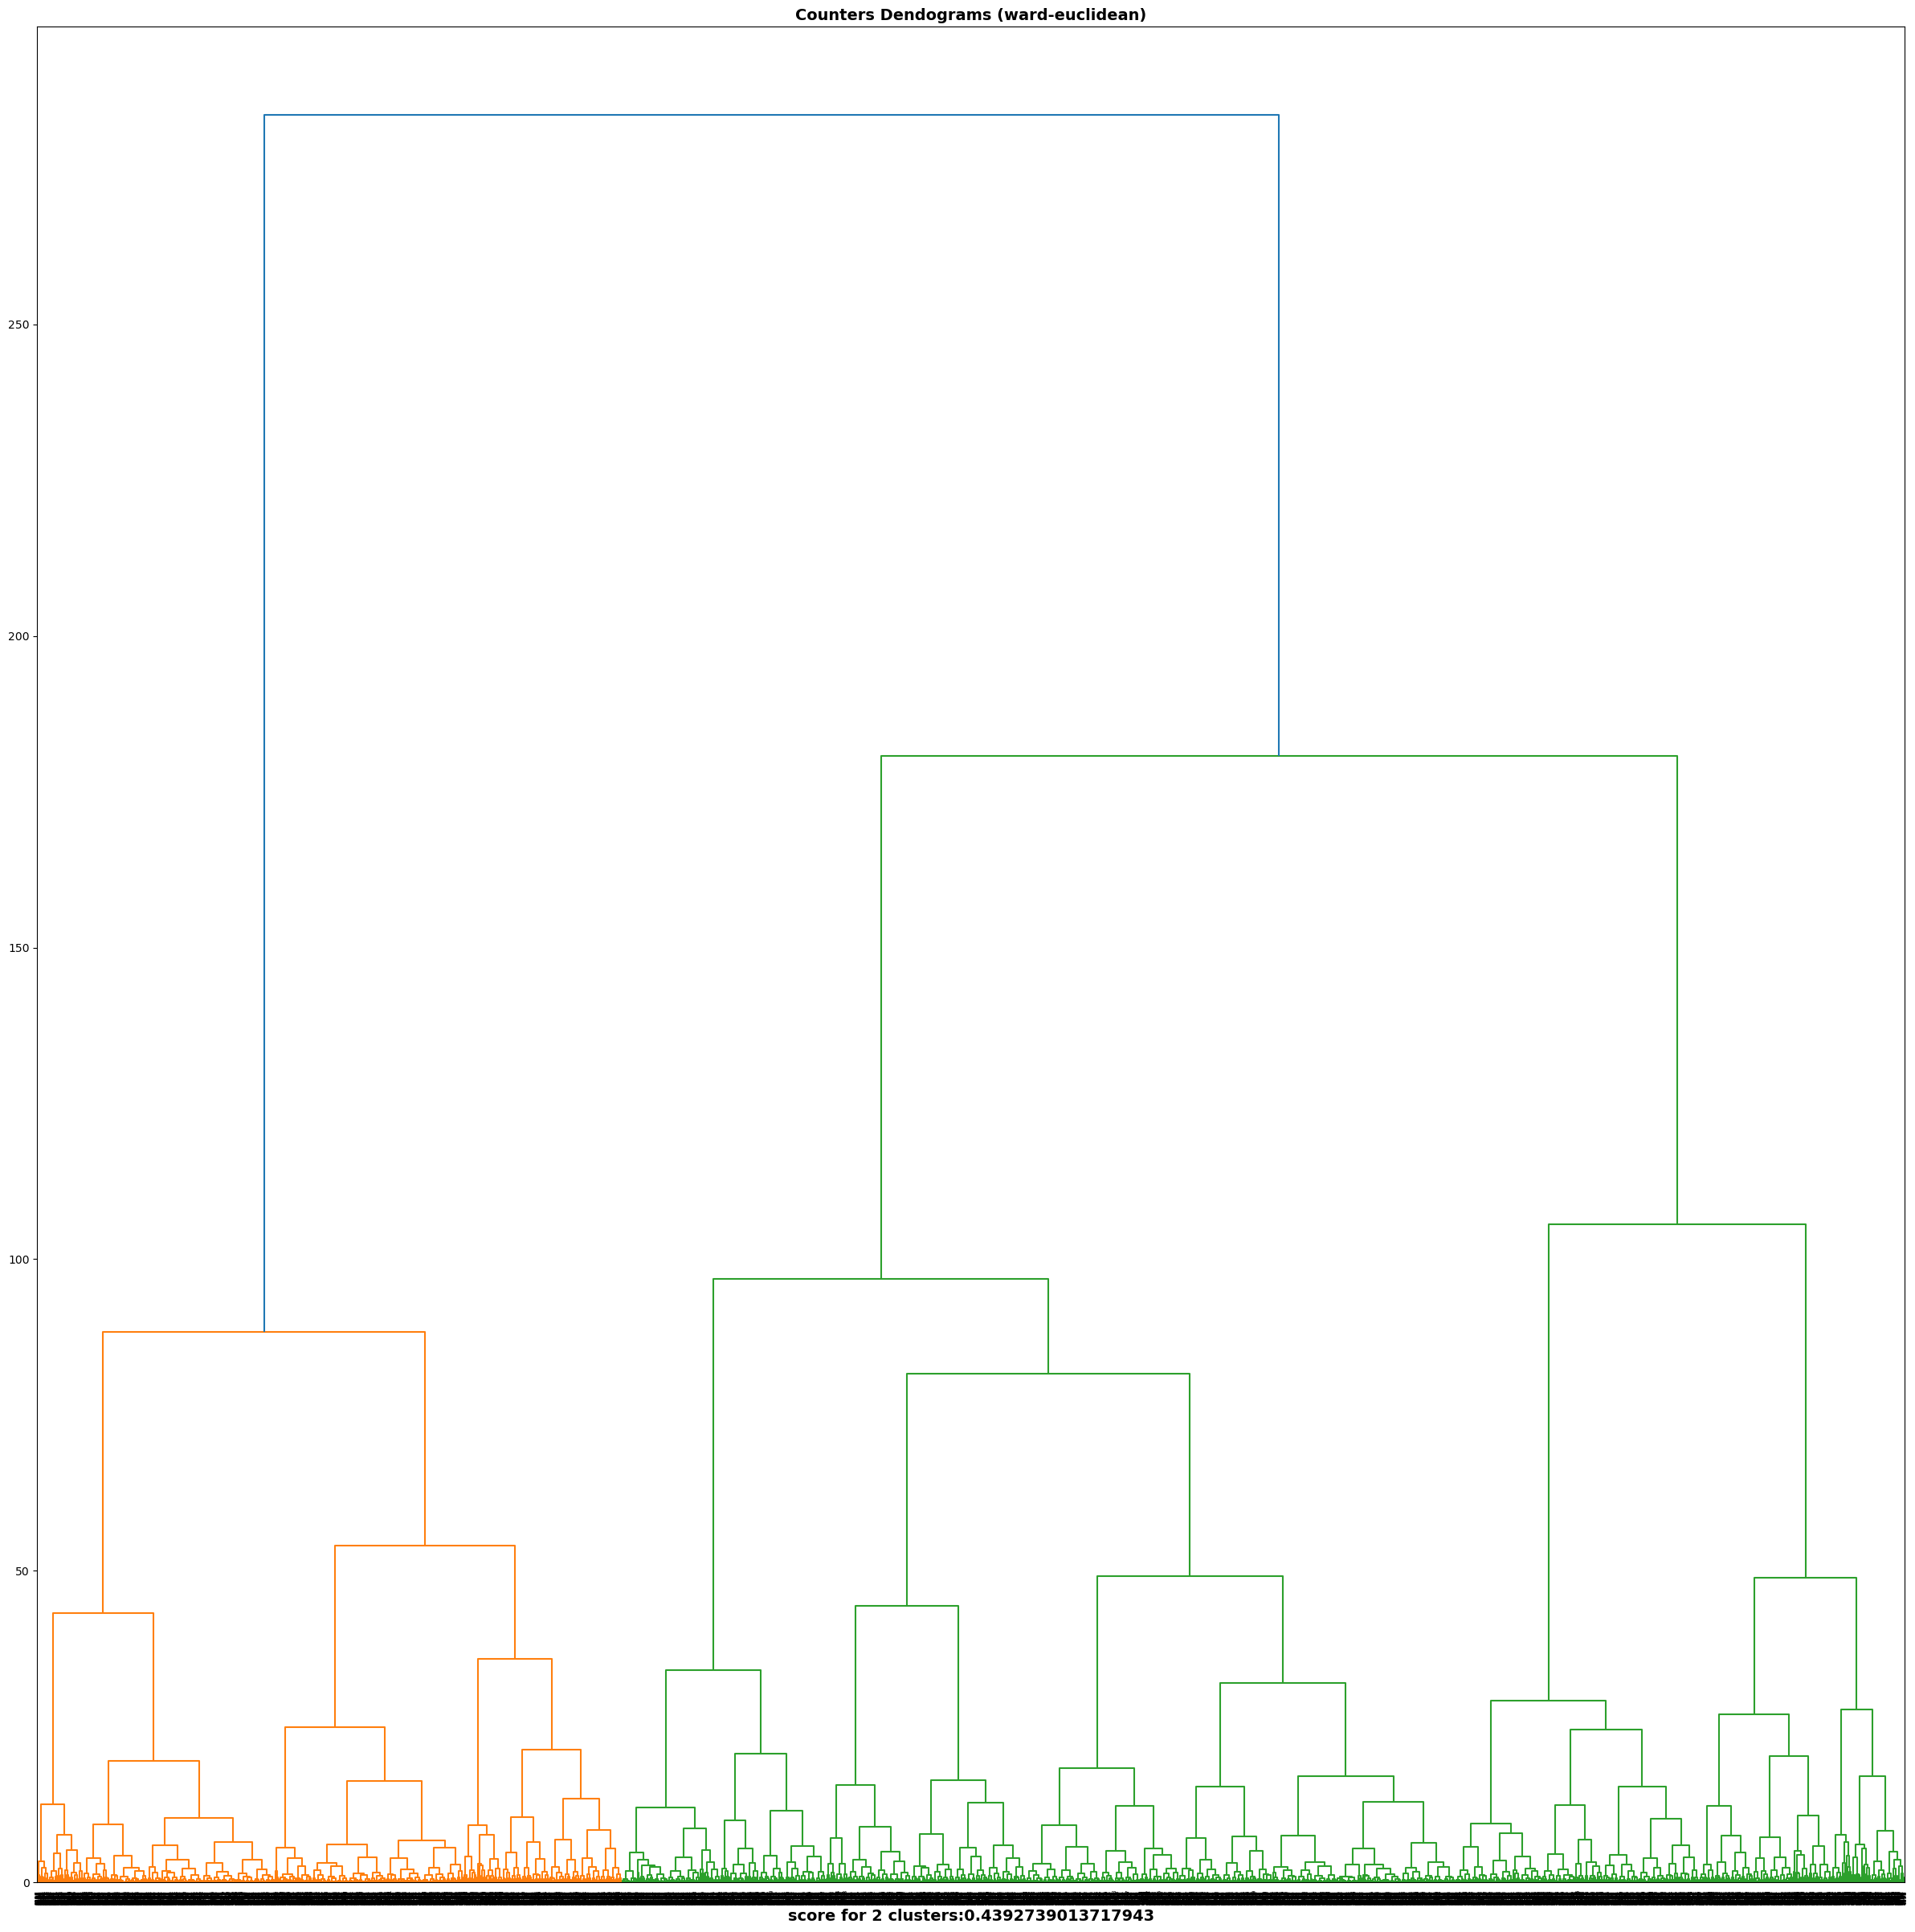

In [172]:
draw_dendogram(dd,["ward"])
#ward with k =3 is good

### ward with k = 2 have good clustering and shape (agglomerative)
### ward with  k = 3 have good clustering and score (agglomerative + PCA component = 2)

## DBSCAN

<Figure size 1500x500 with 0 Axes>

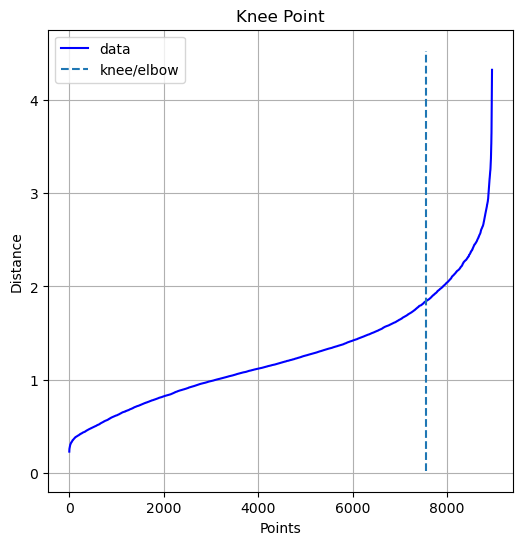

Elbow Distance : 1.8389763752729766


In [86]:
draw_dbscan(data_1)

In [182]:
print_k_dbscan(data_1,1.8389)

#Clustering is getting better from 65

Sillouette score -0.12767408107185468
 data clustered using min_neighbors=5 :
[[-1.00000000e+00  4.00000000e+00]
 [ 0.00000000e+00  8.18994413e+01]
 [ 1.00000000e+00  5.48603352e+00]
 [ 2.00000000e+00  1.22905028e-01]
 [ 3.00000000e+00  8.93854749e-02]
 [ 4.00000000e+00  3.96648045e+00]
 [ 5.00000000e+00  1.20670391e+00]
 [ 6.00000000e+00  2.34636872e+00]
 [ 7.00000000e+00  1.67597765e-01]
 [ 8.00000000e+00  1.89944134e-01]
 [ 9.00000000e+00  2.01117318e-01]
 [ 1.00000000e+01  5.58659218e-02]
 [ 1.10000000e+01  3.35195531e-02]
 [ 1.20000000e+01  1.22905028e-01]
 [ 1.30000000e+01  4.46927374e-02]
 [ 1.40000000e+01  6.70391061e-02]] percentage
 -------------------------------- 

Sillouette score -0.1614717158208435
 data clustered using min_neighbors=15 :
[[-1.          9.25139665]
 [ 0.         79.92178771]
 [ 1.          4.84916201]
 [ 2.          1.01675978]
 [ 3.          2.79329609]
 [ 4.          0.3575419 ]
 [ 5.          1.08379888]
 [ 6.          0.26815642]
 [ 7.          0.167

## DBSCAN + PCA

<Figure size 1500x500 with 0 Axes>

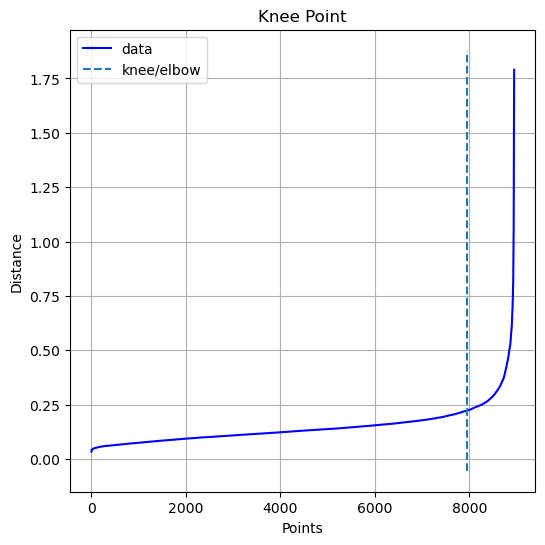

Elbow Distance : 0.22295239416349877


In [198]:
# for k=2


pca=PCA(n_components=2)
dd=pca.fit_transform(data_2)
dd=pd.DataFrame(dd)
draw_dbscan(dd)

In [199]:
print_k_dbscan(dd,0.2229)
## neighbors at 35 has the logical clustered data

Sillouette score -0.03724348326777463
 data clustered using min_neighbors=5 :
[[-1.00000000e+00  2.13407821e+00]
 [ 0.00000000e+00  9.76424581e+01]
 [ 1.00000000e+00  5.58659218e-02]
 [ 2.00000000e+00  1.11731844e-01]
 [ 3.00000000e+00  5.58659218e-02]] percentage
 -------------------------------- 

Sillouette score -0.1178993302752874
 data clustered using min_neighbors=15 :
[[-1.          9.56424581]
 [ 0.         66.25698324]
 [ 1.         21.25139665]
 [ 2.          0.68156425]
 [ 3.          0.43575419]
 [ 4.          0.17877095]
 [ 5.          0.89385475]
 [ 6.          0.64804469]
 [ 7.          0.08938547]] percentage
 -------------------------------- 

Sillouette score -0.016628712980222952
 data clustered using min_neighbors=25 :
[[-1.         24.60335196]
 [ 0.         20.11173184]
 [ 1.         52.27932961]
 [ 2.          1.09497207]
 [ 3.          0.12290503]
 [ 4.          1.10614525]
 [ 5.          0.29050279]
 [ 6.          0.39106145]] percentage
 ---------------------

## GMM

 data clustered using k=2 :
[[ 0.         75.08379888]
 [ 1.         24.91620112]] percentage
sillhouette score : 0.23076763442195855
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         25.50837989]
 [ 1.         22.78212291]
 [ 2.         51.70949721]] percentage
sillhouette score : 0.22013760373257996
--------------------------------------------------------
 data clustered using k=4 :
[[ 0.         25.50837989]
 [ 1.         20.10055866]
 [ 2.         22.78212291]
 [ 3.         31.60893855]] percentage
sillhouette score : 0.2085466924474443
--------------------------------------------------------
 data clustered using k=5 :
[[ 0.         19.56424581]
 [ 1.         22.78212291]
 [ 2.          6.        ]
 [ 3.         20.10055866]
 [ 4.         31.55307263]] percentage
sillhouette score : 0.16871469454870552
--------------------------------------------------------
 data clustered using k=6 :
[[ 0.         19.67597765]
 [ 1.         14.201

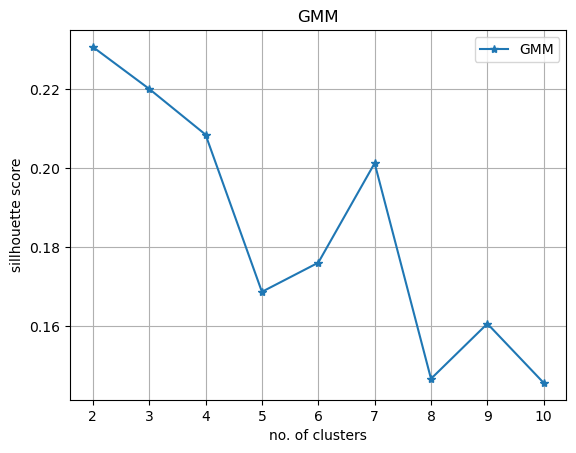

In [201]:
draw_elbow_gmm(data_1)
#data clustered at k=4 has the most logical clustering

## GMM + PCA

 for PCA component : 2 
 data clustered using k=2 :
[[ 0.         22.69273743]
 [ 1.         77.30726257]] percentage
sillhouette score : 0.39315337670967626
--------------------------------------------------------
 for PCA component : 3 
 data clustered using k=2 :
[[ 0.         22.27932961]
 [ 1.         77.72067039]] percentage
sillhouette score : 0.329827043099669
--------------------------------------------------------
 for PCA component : 4 
 data clustered using k=2 :
[[ 0.         72.12290503]
 [ 1.         27.87709497]] percentage
sillhouette score : 0.3260214470588135
--------------------------------------------------------
 for PCA component : 5 
 data clustered using k=2 :
[[ 0.         73.58659218]
 [ 1.         26.41340782]] percentage
sillhouette score : 0.29707438130216884
--------------------------------------------------------
 for PCA component : 6 
 data clustered using k=2 :
[[ 0.         27.70949721]
 [ 1.         72.29050279]] percentage
sillhouette score : 0.285

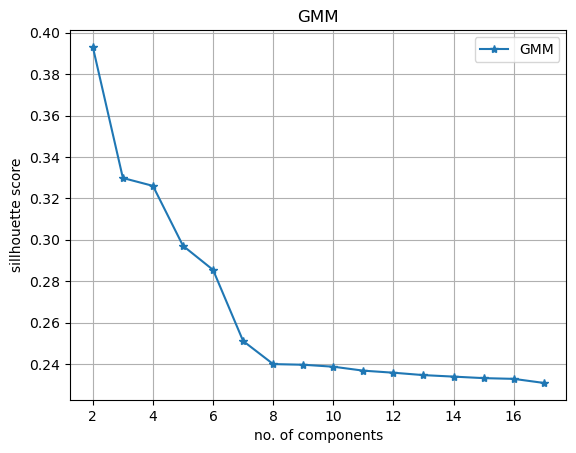

In [215]:


draw_gmm_pca(data_2,2)



 data clustered using k=2 :
[[ 0.         22.65921788]
 [ 1.         77.34078212]] percentage
sillhouette score : 0.39281012326832926
--------------------------------------------------------
 data clustered using k=3 :
[[ 0.         41.72067039]
 [ 1.         22.65921788]
 [ 2.         35.62011173]] percentage
sillhouette score : 0.35502060640009026
--------------------------------------------------------
 data clustered using k=4 :
[[ 0.         19.94413408]
 [ 1.         22.80446927]
 [ 2.         29.79888268]
 [ 3.         27.45251397]] percentage
sillhouette score : 0.3708370279287464
--------------------------------------------------------
 data clustered using k=5 :
[[ 0.         13.16201117]
 [ 1.         14.32402235]
 [ 2.         22.78212291]
 [ 3.         22.32402235]
 [ 4.         27.40782123]] percentage
sillhouette score : 0.3392325564695918
--------------------------------------------------------
 data clustered using k=6 :
[[ 0.         14.01117318]
 [ 1.         22.9720

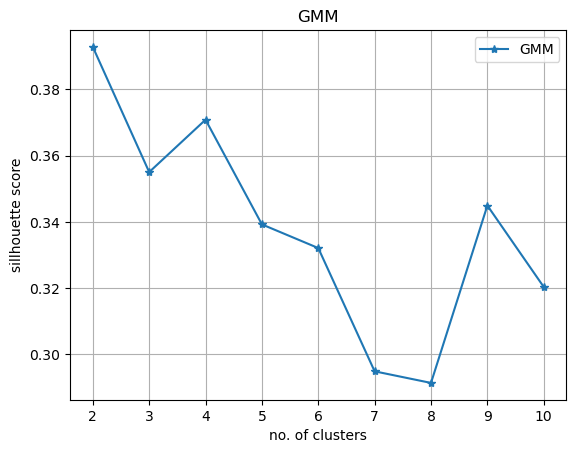

In [216]:
pca=PCA(n_components=2)
dd=pca.fit_transform(data_2)
dd=pd.DataFrame(dd)

draw_elbow_gmm(dd)

### gmm at k = 4 has the logical clustering
### gmm + PCA  at k =4 with PCA component = 2 has higher score 